In [86]:
import numpy as np
import torch
import torch.nn as nn
import torchvision as tv
import cv2 as cv
from ntm.ntm import NTM
from ntm.controller import LSTMController
from ntm.head import NTMWriteHead, NTMReadHead
from ntm.memory import NTMMemory
from ntm.encapsulated import EncapsulatedNTM
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
N, M = 120, 120

num_inputs = 80
num_outputs = 32
num_layers = 2

controller_size = 100
num_heads = 1

# num_inputs + M * num_heads

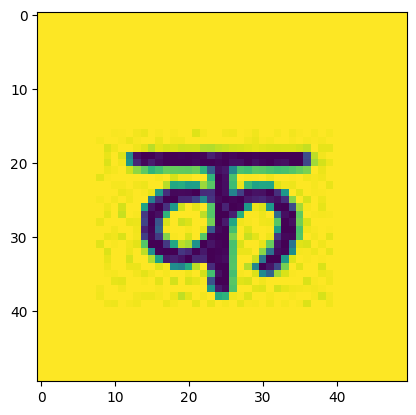

In [67]:
v = tv.io.image.decode_jpeg(enc_char1)
plt.imshow(v.permute(1,2,0))

In [17]:
Im= tv.utils.Image.Image()

In [3]:
cell = EncapsulatedNTM(
    num_inputs=num_inputs,
    num_outputs=num_outputs,
    controller_size=controller_size,
    controller_layers=num_layers,
    num_heads=1,
    N=N,
    M=M
)

In [4]:
cell.init_sequence(batch_size=4)

In [5]:
cell.memory.memory.size()



torch.Size([4, 120, 120])

In [3]:
csv_path = "data/final_80_features.csv"
features_and_labels = pd.read_csv(csv_path)

features_and_labels

,529,429,600,1583,1003,1708,38,793,1020,1503,...,575,1542,1126,899,1522,741,275,1123,1757,labels
0,0.160751,0.000000,0.000000,1.164665,0.411528,0.000000,0.000000,0.000000,2.347005,0.000000,...,0.237509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.360355,0.036318,0.016661,0.000000,2.535782,2.408298,1.104285,0.000000,0.109834,1.341766,...,0.066502,1.195841,1.017552,0.306543,4.660774,1.194988,0.000000,1.320019,0.711735,1
2,0.000000,0.235436,0.000000,0.126883,0.000000,0.000000,0.000000,0.837503,0.077218,0.948346,...,0.000000,0.235417,0.084102,0.000000,0.000000,0.000000,0.000000,0.000000,1.219687,2
3,0.000000,0.676321,0.088754,1.581639,0.000000,0.398123,0.000000,0.000000,0.911793,0.000000,...,0.052177,0.786023,0.000000,1.076559,0.198894,0.640127,0.829963,0.335316,1.086302,4
4,0.000000,0.460200,1.152315,0.000000,1.431127,0.461240,0.716281,0.000000,0.798825,1.207885,...,1.277711,0.000000,3.306082,0.096395,0.039457,0.000000,0.000000,0.000000,1.185793,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.166207,0.000000,1.015810,0.709898,0.070699,1.133485,0.606619,0.229006,1.744559,0.409903,...,0.143646,1.075151,3.338962,0.000000,0.684950,0.419209,1.449569,0.153156,0.400220,32
156,0.756977,0.456375,0.293851,1.986922,1.946342,0.000000,1.198460,0.863284,0.731359,0.981429,...,0.456500,0.000000,0.000000,0.755649,0.523964,0.000000,0.460823,2.361780,0.012915,33
157,0.291869,0.263729,0.000000,0.000000,0.227685,0.000000,0.000000,0.008934,1.983933,0.247986,...,0.693777,0.000000,0.000000,0.000000,0.000000,0.000000,0.558063,0.000000,0.000000,34
158,0.000000,0.861166,0.574466,0.095937,0.538186,0.000000,0.000000,0.000000,1.360662,0.322281,...,0.570556,0.996321,0.174717,0.800462,0.665416,1.788651,0.000000,1.185145,1.043756,35


In [4]:
cols_wo_labels=features_and_labels.columns[:-1]

In [5]:
# # to get the features of the images with unique labels
# labels_ = features_and_labels["labels"].unique()

# # 
# for label in labels_:
#     features_and_labels.loc[features_and_labels["labels"] == label][0,:] 

In [6]:
f_ = features_and_labels.head(32)
features_ndarray = f_[cols_wo_labels].to_numpy()

In [7]:
features_ndarray.shape

(32, 80)

In [8]:
first_char = features_ndarray[:4]
first_char= torch.from_numpy(first_char)

In [9]:
first_char.size()

torch.Size([4, 80])

In [13]:
# first_char = first_char.unsqueeze(0)
o, prev_state = cell(first_char)


/media/ashatya/Data/work/envs/torch/lib/python3.10/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


(tensor([[0.5103, 0.4762, 0.4961, 0.4858, 0.5386, 0.5137, 0.5113, 0.5053, 0.4942,
          0.4996, 0.4781, 0.5088, 0.4852, 0.4970, 0.5089, 0.5147, 0.4609, 0.4784,
          0.5058, 0.5103, 0.5138, 0.5046, 0.4997, 0.5132, 0.4856, 0.5079, 0.4725,
          0.5046, 0.4994, 0.4945, 0.4892, 0.4884],
         [0.4807, 0.4603, 0.5068, 0.4814, 0.5550, 0.5109, 0.5225, 0.4817, 0.4890,
          0.4745, 0.4717, 0.4552, 0.5010, 0.4877, 0.5165, 0.4807, 0.4807, 0.4689,
          0.5038, 0.5135, 0.5053, 0.5285, 0.4745, 0.4707, 0.4833, 0.5020, 0.4552,
          0.5080, 0.4940, 0.5282, 0.4587, 0.4875],
         [0.4746, 0.4668, 0.5086, 0.5078, 0.5343, 0.4991, 0.5281, 0.4779, 0.4973,
          0.4883, 0.4786, 0.5084, 0.4842, 0.4900, 0.5275, 0.5193, 0.4903, 0.5170,
          0.4928, 0.5149, 0.4996, 0.4907, 0.5023, 0.5077, 0.4821, 0.5142, 0.4800,
          0.5083, 0.5116, 0.4847, 0.4944, 0.5098],
         [0.4869, 0.4689, 0.5124, 0.4638, 0.5507, 0.5303, 0.5209, 0.4919, 0.5207,
          0.4925, 0.4487, 0

In [15]:
cell.memory.memory

tensor([[[-0.0300, -0.0147,  0.0086,  ...,  0.0491, -0.0213,  0.0236],
         [ 0.0414,  0.0359,  0.0154,  ...,  0.0299, -0.0052,  0.0160],
         [-0.0052,  0.0181, -0.0204,  ...,  0.0037, -0.0510, -0.0168],
         ...,
         [ 0.0456, -0.0360,  0.0263,  ...,  0.0099,  0.0357, -0.0155],
         [-0.0272, -0.0205, -0.0326,  ...,  0.0164, -0.0600, -0.0427],
         [ 0.0591,  0.0145, -0.0403,  ..., -0.0066, -0.0461,  0.0003]],

        [[-0.0291, -0.0160,  0.0087,  ...,  0.0499, -0.0207,  0.0235],
         [ 0.0423,  0.0346,  0.0155,  ...,  0.0306, -0.0047,  0.0160],
         [-0.0044,  0.0169, -0.0203,  ...,  0.0044, -0.0504, -0.0169],
         ...,
         [ 0.0465, -0.0372,  0.0264,  ...,  0.0105,  0.0362, -0.0155],
         [-0.0263, -0.0218, -0.0326,  ...,  0.0171, -0.0596, -0.0428],
         [ 0.0601,  0.0133, -0.0403,  ..., -0.0059, -0.0457,  0.0003]],

        [[-0.0294, -0.0148,  0.0090,  ...,  0.0486, -0.0210,  0.0241],
         [ 0.0420,  0.0358,  0.0158,  ...,  0

In [14]:
char2 = features_ndarray[4:8]
char2 = torch.from_numpy(char2)


In [ ]:
cell(char2)

In [17]:
cell.memory.memory

tensor([[[-3.1923e-02, -1.4357e-02,  9.1393e-03,  ...,  4.8428e-02,
          -2.0301e-02,  2.3230e-02],
         [ 3.9108e-02,  3.6065e-02,  1.5936e-02,  ...,  2.9256e-02,
          -4.2795e-03,  1.5707e-02],
         [-7.2628e-03,  1.8332e-02, -1.9701e-02,  ...,  3.1880e-03,
          -4.9884e-02, -1.6962e-02],
         ...,
         [ 4.3497e-02, -3.5607e-02,  2.6737e-02,  ...,  9.3972e-03,
           3.6376e-02, -1.5626e-02],
         [-2.9071e-02, -2.0159e-02, -3.1908e-02,  ...,  1.5878e-02,
          -5.8813e-02, -4.2741e-02],
         [ 5.6733e-02,  1.4767e-02, -3.9490e-02,  ..., -6.9856e-03,
          -4.4977e-02,  1.1068e-04]],

        [[-2.9835e-02, -1.6253e-02,  9.0972e-03,  ...,  4.9763e-02,
          -1.9108e-02,  2.3110e-02],
         [ 4.1273e-02,  3.4162e-02,  1.5883e-02,  ...,  3.0591e-02,
          -3.1152e-03,  1.5589e-02],
         [-5.1535e-03,  1.6510e-02, -1.9785e-02,  ...,  4.4725e-03,
          -4.8800e-02, -1.7060e-02],
         ...,
         [ 4.5616e-02, -3

In [18]:
char3 = features_ndarray[8:12]
char3 = torch.from_numpy(char3)

In [21]:
cell(char3)
cell.memory.memory

/media/ashatya/Data/work/envs/torch/lib/python3.10/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[[-3.5559e-02, -1.3045e-02,  9.0926e-03,  ...,  4.6945e-02,
          -1.8037e-02,  2.3270e-02],
         [ 3.4572e-02,  3.7036e-02,  1.5803e-02,  ...,  2.7877e-02,
          -2.0244e-03,  1.5848e-02],
         [-1.1400e-02,  1.9469e-02, -1.9446e-02,  ...,  2.0839e-03,
          -4.7133e-02, -1.6467e-02],
         ...,
         [ 3.9251e-02, -3.4127e-02,  2.6501e-02,  ...,  8.3167e-03,
           3.8085e-02, -1.5181e-02],
         [-3.2769e-02, -1.8779e-02, -3.1538e-02,  ...,  1.4713e-02,
          -5.6145e-02, -4.2031e-02],
         [ 5.2277e-02,  1.5855e-02, -3.9039e-02,  ..., -7.9036e-03,
          -4.2453e-02,  3.8500e-04]],

        [[-3.3219e-02, -1.7239e-02,  1.2133e-02,  ...,  4.8540e-02,
          -1.6487e-02,  2.2783e-02],
         [ 3.7045e-02,  3.2605e-02,  1.8903e-02,  ...,  2.9549e-02,
          -6.1213e-04,  1.5332e-02],
         [-8.5018e-03,  1.5285e-02, -1.6700e-02,  ...,  3.7910e-03,
          -4.6107e-02, -1.6991e-02],
         ...,
         [ 4.2496e-02, -3

In [22]:
char4 = features_ndarray[12:16]
char4 = torch.from_numpy(char4)
cell(char4)
cell.memory.memory

/media/ashatya/Data/work/envs/torch/lib/python3.10/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[[-0.0359, -0.0117,  0.0090,  ...,  0.0460, -0.0171,  0.0249],
         [ 0.0338,  0.0382,  0.0157,  ...,  0.0270, -0.0011,  0.0176],
         [-0.0119,  0.0207, -0.0194,  ...,  0.0013, -0.0460, -0.0145],
         ...,
         [ 0.0385, -0.0327,  0.0263,  ...,  0.0076,  0.0388, -0.0134],
         [-0.0332, -0.0174, -0.0314,  ...,  0.0139, -0.0550, -0.0401],
         [ 0.0515,  0.0170, -0.0389,  ..., -0.0086, -0.0414,  0.0021]],

        [[-0.0352, -0.0180,  0.0129,  ...,  0.0466, -0.0141,  0.0235],
         [ 0.0346,  0.0315,  0.0197,  ...,  0.0278,  0.0017,  0.0161],
         [-0.0104,  0.0144, -0.0158,  ...,  0.0023, -0.0439, -0.0162],
         ...,
         [ 0.0408, -0.0384,  0.0293,  ...,  0.0089,  0.0402, -0.0151],
         [-0.0312, -0.0233, -0.0285,  ...,  0.0151, -0.0536, -0.0418],
         [ 0.0528,  0.0109, -0.0354,  ..., -0.0077, -0.0392,  0.0007]],

        [[-0.0271, -0.0157,  0.0114,  ...,  0.0470, -0.0142,  0.0225],
         [ 0.0428,  0.0337,  0.0181,  ...,  0

In [23]:
char5 = features_ndarray[16:20]
char5 = torch.from_numpy(char5)
cell(char5)
cell.memory.memory

/media/ashatya/Data/work/envs/torch/lib/python3.10/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[[-0.0360, -0.0106,  0.0087,  ...,  0.0448, -0.0171,  0.0262],
         [ 0.0334,  0.0392,  0.0153,  ...,  0.0258, -0.0012,  0.0191],
         [-0.0121,  0.0218, -0.0196,  ...,  0.0003, -0.0459, -0.0129],
         ...,
         [ 0.0381, -0.0315,  0.0260,  ...,  0.0065,  0.0385, -0.0119],
         [-0.0332, -0.0162, -0.0315,  ...,  0.0129, -0.0549, -0.0384],
         [ 0.0511,  0.0181, -0.0390,  ..., -0.0095, -0.0413,  0.0035]],

        [[-0.0370, -0.0190,  0.0141,  ...,  0.0445, -0.0116,  0.0242],
         [ 0.0325,  0.0303,  0.0208,  ...,  0.0258,  0.0040,  0.0168],
         [-0.0120,  0.0135, -0.0147,  ...,  0.0007, -0.0416, -0.0154],
         ...,
         [ 0.0393, -0.0389,  0.0300,  ...,  0.0076,  0.0417, -0.0144],
         [-0.0326, -0.0240, -0.0274,  ...,  0.0136, -0.0516, -0.0410],
         [ 0.0507,  0.0099, -0.0341,  ..., -0.0094, -0.0368,  0.0014]],

        [[-0.0292, -0.0184,  0.0129,  ...,  0.0452, -0.0114,  0.0238],
         [ 0.0402,  0.0306,  0.0196,  ...,  0

In [24]:
char6 = features_ndarray[20:24]
char6 = torch.from_numpy(char6)
cell(char6)
cell.memory.memory

/media/ashatya/Data/work/envs/torch/lib/python3.10/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[[-3.6301e-02, -9.5417e-03,  8.7518e-03,  ...,  4.3111e-02,
          -1.6758e-02,  2.7616e-02],
         [ 3.2811e-02,  4.0054e-02,  1.5339e-02,  ...,  2.4114e-02,
          -8.7478e-04,  2.0582e-02],
         [-1.2500e-02,  2.2674e-02, -1.9409e-02,  ..., -1.1946e-03,
          -4.5409e-02, -1.1335e-02],
         ...,
         [ 3.7556e-02, -3.0388e-02,  2.5925e-02,  ...,  5.1012e-03,
           3.8655e-02, -1.0335e-02],
         [-3.3543e-02, -1.5202e-02, -3.1337e-02,  ...,  1.1367e-02,
          -5.4392e-02, -3.6735e-02],
         [ 5.0406e-02,  1.8943e-02, -3.8737e-02,  ..., -1.0905e-02,
          -4.0881e-02,  5.0173e-03]],

        [[-3.7322e-02, -1.9469e-02,  1.5184e-02,  ...,  4.1928e-02,
          -1.0055e-02,  2.5276e-02],
         [ 3.1741e-02,  2.9469e-02,  2.1808e-02,  ...,  2.3306e-02,
           5.5059e-03,  1.7925e-02],
         [-1.2442e-02,  1.2830e-02, -1.3607e-02,  ..., -1.2705e-03,
          -4.0098e-02, -1.4280e-02],
         ...,
         [ 3.8756e-02, -3

In [25]:
char7 = features_ndarray[24:28]
char7 = torch.from_numpy(char7)
cell(char7)
cell.memory.memory

/media/ashatya/Data/work/envs/torch/lib/python3.10/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[[-0.0366, -0.0093,  0.0089,  ...,  0.0418, -0.0168,  0.0282],
         [ 0.0322,  0.0400,  0.0154,  ...,  0.0229, -0.0010,  0.0212],
         [-0.0129,  0.0227, -0.0192,  ..., -0.0022, -0.0454, -0.0106],
         ...,
         [ 0.0369, -0.0301,  0.0259,  ...,  0.0041,  0.0384, -0.0096],
         [-0.0339, -0.0150, -0.0311,  ...,  0.0103, -0.0543, -0.0359],
         [ 0.0497,  0.0190, -0.0384,  ..., -0.0119, -0.0408,  0.0057]],

        [[-0.0371, -0.0184,  0.0169,  ...,  0.0397, -0.0091,  0.0263],
         [ 0.0315,  0.0303,  0.0235,  ...,  0.0212,  0.0064,  0.0190],
         [-0.0124,  0.0136, -0.0120,  ..., -0.0030, -0.0391, -0.0132],
         ...,
         [ 0.0386, -0.0383,  0.0318,  ...,  0.0044,  0.0431, -0.0126],
         [-0.0327, -0.0234, -0.0248,  ...,  0.0101, -0.0492, -0.0388],
         [ 0.0497,  0.0101, -0.0310,  ..., -0.0132, -0.0343,  0.0035]],

        [[-0.0335, -0.0218,  0.0150,  ...,  0.0424, -0.0061,  0.0259],
         [ 0.0350,  0.0264,  0.0217,  ...,  0

In [26]:
char8 = features_ndarray[28:32]
char8 = torch.from_numpy(char8)
cell(char8)
cell.memory.memory

/media/ashatya/Data/work/envs/torch/lib/python3.10/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[[-0.0373, -0.0101,  0.0094,  ...,  0.0414, -0.0171,  0.0282],
         [ 0.0312,  0.0390,  0.0159,  ...,  0.0225, -0.0013,  0.0213],
         [-0.0136,  0.0219, -0.0186,  ..., -0.0024, -0.0455, -0.0104],
         ...,
         [ 0.0360, -0.0307,  0.0263,  ...,  0.0038,  0.0379, -0.0094],
         [-0.0345, -0.0157, -0.0304,  ...,  0.0100, -0.0544, -0.0356],
         [ 0.0487,  0.0181, -0.0377,  ..., -0.0121, -0.0410,  0.0058]],

        [[-0.0376, -0.0182,  0.0187,  ...,  0.0368, -0.0089,  0.0278],
         [ 0.0306,  0.0301,  0.0252,  ...,  0.0184,  0.0064,  0.0205],
         [-0.0130,  0.0136, -0.0102,  ..., -0.0053, -0.0388, -0.0117],
         ...,
         [ 0.0379, -0.0380,  0.0331,  ...,  0.0024,  0.0430, -0.0113],
         [-0.0332, -0.0233, -0.0231,  ...,  0.0079, -0.0489, -0.0372],
         [ 0.0488,  0.0101, -0.0291,  ..., -0.0155, -0.0340,  0.0050]],

        [[-0.0349, -0.0234,  0.0157,  ...,  0.0416, -0.0043,  0.0277],
         [ 0.0332,  0.0244,  0.0225,  ...,  0

In [17]:
controller.size()

(80, 32)

In [87]:
features_=pd.read_csv("data/final_80_features.csv")
feats = features_.columns[:-1]
feats = np.array(feats).astype(np.int32)

# Training NTM for Atoms

In [ ]:
# 1. model
# 2. optimizer
# 3. loss function

## Dataset preparation for training

In [43]:
import os

from torch.utils.data import Dataset, DataLoader
from torchvision.io.image import read_image
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
import pandas as pd

In [88]:
class AtomicCharsDataset(Dataset):
    def __init__(
        self, 
        annotations_file:pd.DataFrame,
        img_dir:str, 
        target_transform:None
        ) -> None:
        self.image_labels = pd.read_csv(annotations_file).reset_index(drop=True)
        self.img_dir = img_dir
        self.transforms = transforms.Compose([
            transforms.Resize(40),
            transforms.CenterCrop(40),
            transforms.ConvertImageDtype(torch.float),
            # transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
        device = "cuda" if torch.cuda.is_available() else "cpu"
        self.target_transform = target_transform
        self.feature_extractor_ = torch.hub.load('facebookresearch/WSL-Images', 'resnext101_32x8d_wsl')
        self.feature_extractor = nn.Sequential(*list(self.feature_extractor_.children())[:-1]).to(device)
        
    def __len__(self):
        return len(self.image_labels)
    
    def __getitem__(self, index):
        img_path = os.path.join(self.img_dir, self.image_labels.iloc[index, 0])
        image = read_image(img_path)
        image = self.transforms(image)
        features = self.feature_extractor(image.unsqueeze(0)).squeeze()
        label = self.image_labels.iloc[index, 1]
        if self.target_transform:
            label = self.target_transform(label)
        return features[feats], label

In [75]:
data = pd.read_csv("/media/ashatya/Data/work/self/thesis/humanlike-ocr/data/annotations_atomic_char_5iter.csv")
data

,filename,label
0,atomic_0_0.jpg,0
1,atomic_1_0.jpg,1
2,atomic_2_0.jpg,2
3,atomic_4_0.jpg,4
4,atomic_5_0.jpg,5
...,...,...
155,atomic_32_4.jpg,32
156,atomic_33_4.jpg,33
157,atomic_34_4.jpg,34
158,atomic_35_4.jpg,35


In [30]:
training_data, val_data = train_test_split(data, test_size=0.3, train_size=0.7, random_state=4340, shuffle=True)

In [34]:
training_data.to_csv("train.csv", index = False)
val_data.to_csv("val.csv", index=False)

In [89]:
img_dir = "data/atomic_char"
ann_train = "train.csv"
ann_val = "val.csv"

train_dataset = AtomicCharsDataset(ann_train, img_dir, None)
val_dataset = AtomicCharsDataset(ann_val, img_dir, None)


Using cache found in /home/ashatya/.cache/torch/hub/facebookresearch_WSL-Images_main
Using cache found in /home/ashatya/.cache/torch/hub/facebookresearch_WSL-Images_main


In [97]:
BATCH_SIZE = 2

In [98]:

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

## Prepraring the model for training

In [15]:
from ntm.controller import LSTMController
from ntm.memory import NTMMemory
from ntm.head import NTMReadHead, NTMWriteHead

In [102]:
controller = LSTMController(num_inputs + M*num_heads, num_outputs, num_layers)
memory = NTMMemory(N, M)
read_head = NTMReadHead(memory, controller_size)
write_head = NTMWriteHead(memory, controller_size)

heads = nn.ModuleList([])

for i in range(num_heads):
    heads += [
        NTMReadHead(memory, controller_size),
        NTMWriteHead(memory, controller_size)
    ]
    
    
ntmcell = NTM(num_inputs, num_outputs, controller, memory, heads)

### Loss Function

In [104]:
loss_fn = torch.nn.CrossEntropyLoss()

### Optimizer

In [103]:
optimizer = torch.optim.SGD(ntmcell.parameters(), lr=0.001, momentum=0.9)

### Training Loop

In [105]:
def train_one_epoch(epoch_index, prev_state ,tb_writer):
    running_loss = 0.0
    last_loss = 0.0
    
    for  i, data in enumerate(train_dataloader):
        inputs, labels = data
        
        # zero gradients for every batch
        optimizer.zero_grad()
        
        # make predictions for this batch
        outputs, prev_state = ntmcell(inputs, prev_state)
        
        # compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()
        
        # adjust the learning rate
        optimizer.step()
        
        # gathering data and report
        running_loss += loss.item()
        if i % 10 == 9:
            last_loss = running_loss / 10
            print("batch {} loss: {}".format(i+1, last_loss))
            tb_x = epoch_index * len(train_dataloader) + i + 1
            tb_writer.add_scalar("Loss/train", last_loss, tb_x)
            running_loss = 0.0
            
    return last_loss

In [58]:
from datetime import datetime
from torch.utils.tensorboard import SummaryWriter


In [106]:
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
writer = SummaryWriter("runs/atom_trainer_{}".format(timestamp))

epoch_number = 0

EPOCHS = 5

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print("EPOCH {}".format(epoch_number + 1))
    
    prev_state = ntmcell.create_new_state(BATCH_SIZE)
    
    ntmcell.train(True)
    avg_loss = train_one_epoch(epoch_number, prev_state, writer)
    
    ntmcell.train(False)
    
    vprev_state = ntmcell.create_new_state(BATCH_SIZE)
    running_vloss = 0.0
    for i, vdata in enumerate(val_dataloader):
        vinputs, vlabels = vdata
        voutputs, vprev_state = ntmcell(vinputs, vprev_state)
        vloss = loss_fn(voutputs, vlabels)
        running_vloss += vloss
    
    avg_vloss = running_vloss / (i + 1)
    print("LOSS train {} valid {}".format(avg_loss, avg_vloss))
    
    writer.add_scalars(
        "Training vs. Validation Loss", 
        {"Training": avg_loss, "Validation": avg_vloss},
        epoch_number + 1
        )
    writer.flush()
    
    # track best performance and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = "model_{}_{}".format(timestamp, epoch_number)
        torch.save(ntmcell.state_dict(), model_path)
        
    epoch_number += 1

EPOCH 1


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x32 and 100x126)

In [111]:
a = torch.Tensor([2, 3], dtype=torch.int64)

TypeError: new() received an invalid combination of arguments - got (list, dtype=torch.dtype), but expected one of:
 * (*, torch.device device)
      didn't match because some of the keywords were incorrect: dtype
 * (torch.Storage storage)
 * (Tensor other)
 * (tuple of ints size, *, torch.device device)
 * (object data, *, torch.device device)


In [110]:
torch.nn.functional.one_hot(a, num_classes=3)

RuntimeError: one_hot is only applicable to index tensor.

In [112]:
label

tensor(17)

In [113]:
data["label"].unique()

array([ 0,  1,  2,  4,  5,  6,  7,  8, 10, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36])